In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "food_waste_dataset.csv"  # Change this if necessary
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
dtypes: int

In [23]:
print(df.head())

       Country  combined figures (kg/capita/year)  \
0  Afghanistan                                126   
1      Albania                                127   
2      Algeria                                135   
3      Andorra                                123   
4       Angola                                144   

   Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                                   82                           3109153   
1                                   83                            238492   
2                                   91                           3918529   
3                                   84                              6497   
4                                  100                           3169523   

   Retail estimate (kg/capita/year)  Retail estimate (tonnes/year)  \
0                                16                         594982   
1                                16                          45058   
2             

In [2]:
# Check missing values
print(df.isnull().sum())

# Fill missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical missing values with mode
df['Confidence in estimate'].fillna(df['Confidence in estimate'].mode()[0], inplace=True)


Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
dtype: int64


C:\Users\harendra\AppData\Local\Temp\ipykernel_32580\389051060.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Confidence in estimate'].fillna(df['Confidence in estimate'].mode()[0], inplace=True)


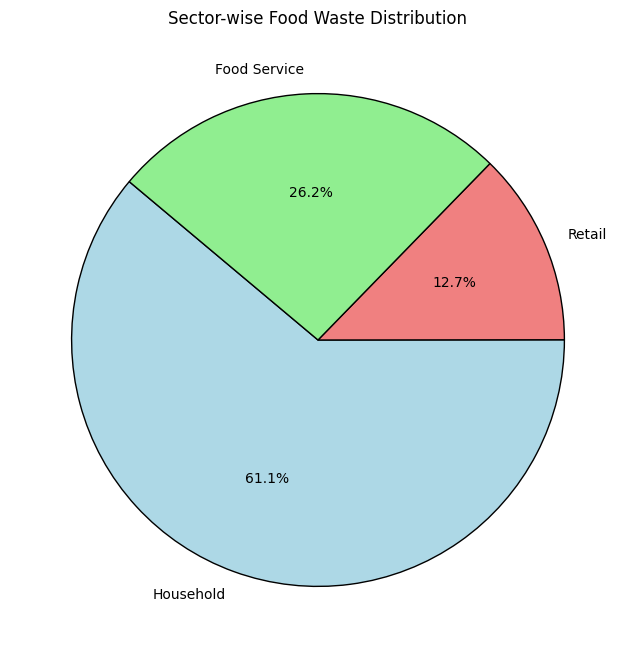

In [21]:
# Summing up the food waste by sector
household_waste = df["Household estimate (tonnes/year)"].sum()
retail_waste = df["Retail estimate (tonnes/year)"].sum()
food_service_waste = df["Food service estimate (tonnes/year)"].sum()
# Labels and values
labels = ["Household", "Retail", "Food Service"]
values = [household_waste, retail_waste, food_service_waste]
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["lightblue", "lightcoral", "lightgreen"], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Sector-wise Food Waste Distribution")
plt.show()

C:\Users\harendra\AppData\Local\Temp\ipykernel_32580\3235379051.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries["Total Food Waste"], y=top_10_countries["Country"], palette="Reds_r")


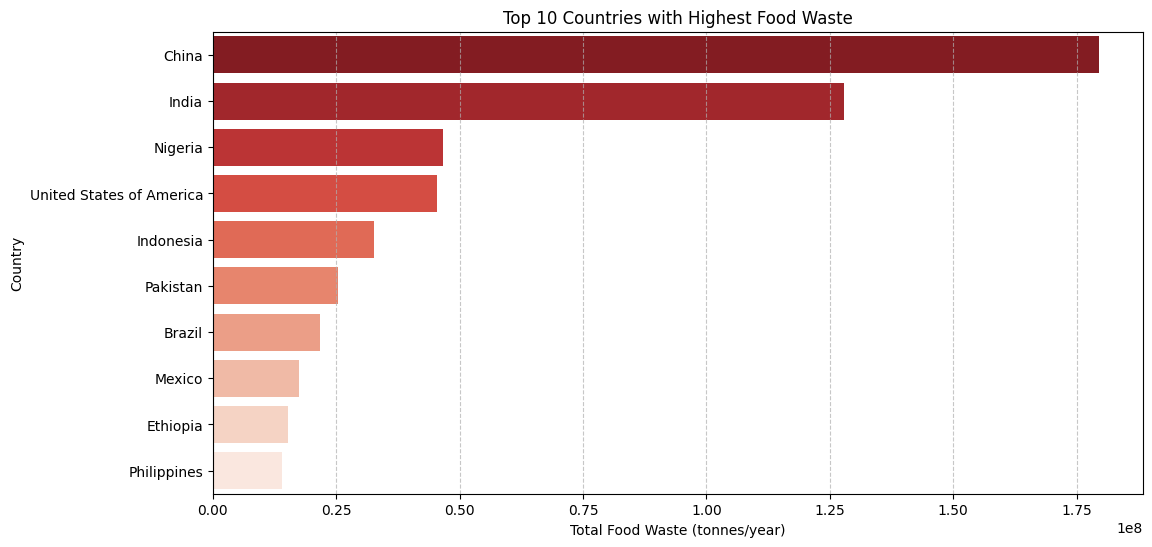

In [22]:
# Calculate total food waste (Household + Retail + Food Service) for each country
df["Total Food Waste"] = df["Household estimate (tonnes/year)"] + df["Retail estimate (tonnes/year)"] + df["Food service estimate (tonnes/year)"]

# Sort by total food waste and select the top 10 countries
top_10_countries = df.nlargest(10, "Total Food Waste")

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries["Total Food Waste"], y=top_10_countries["Country"], palette="Reds_r")
plt.xlabel("Total Food Waste (tonnes/year)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Food Waste")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Display the chart
plt.show()

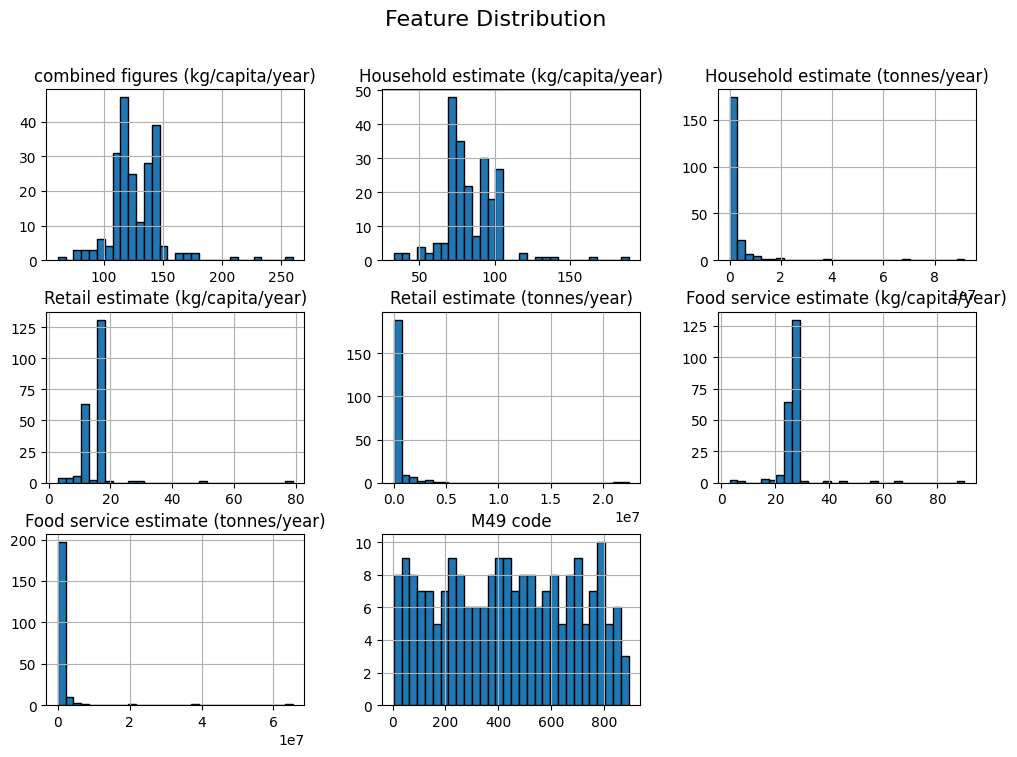

In [3]:
# Histograms for numerical variables
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()


In [4]:
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa


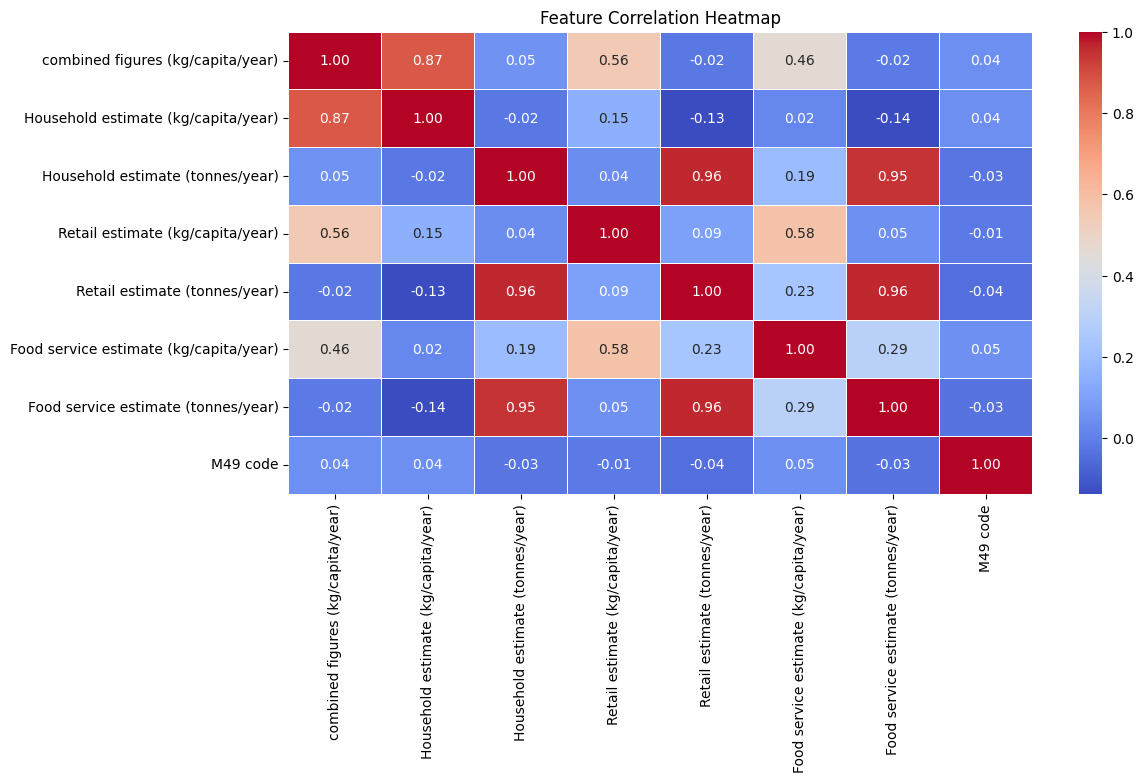

In [5]:
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Region_encoded"] = le.fit_transform(df["Region"])  # Convert "Region" into numbers
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns


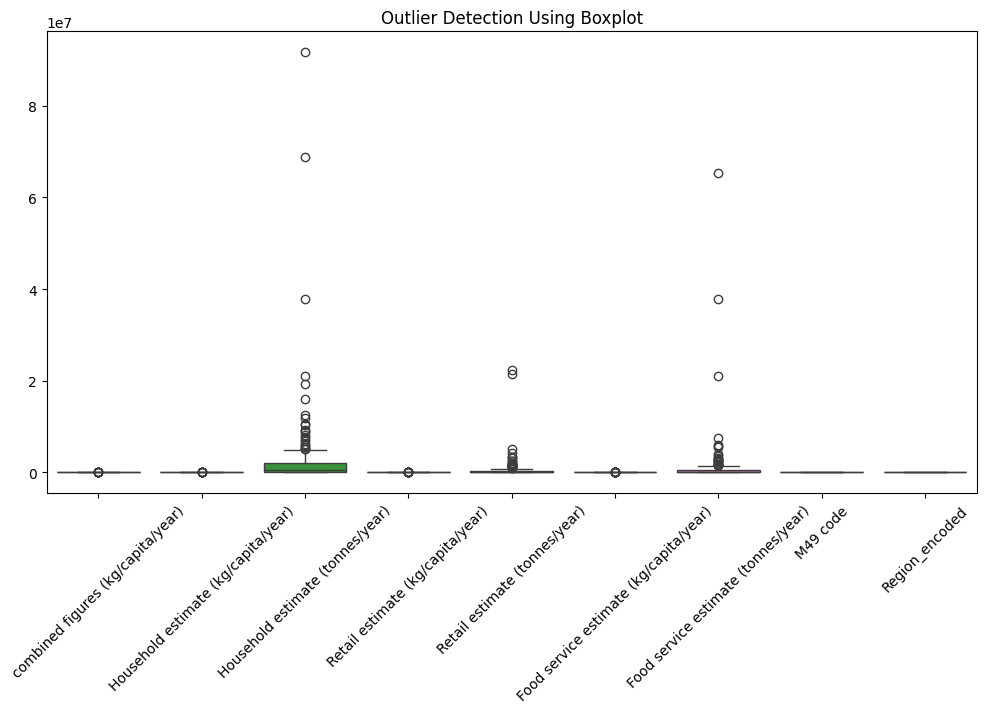

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.title("Outlier Detection Using Boxplot")
plt.show()


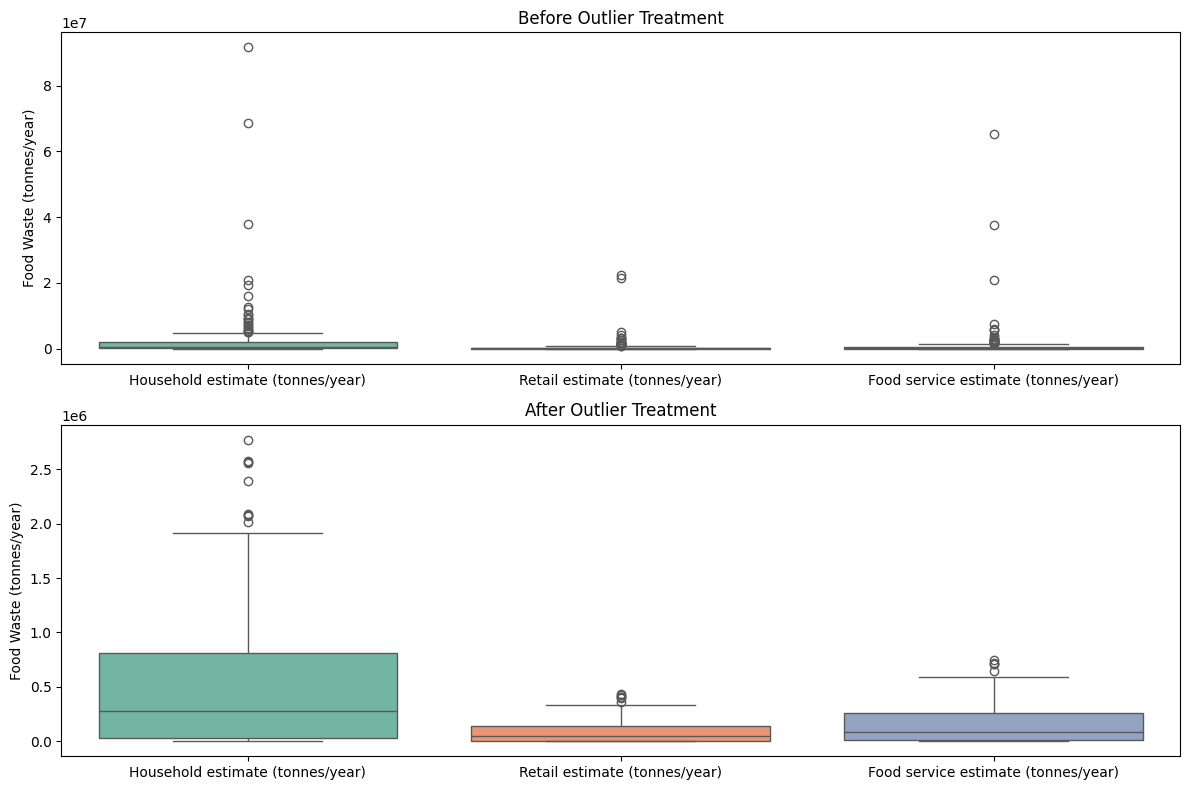

In [28]:
# Select numerical columns for analysis
numerical_columns = ["Household estimate (tonnes/year)", "Retail estimate (tonnes/year)", "Food service estimate (tonnes/year)"]

# Function to detect and remove outliers using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Create a copy of original data for comparison
df_before = df[numerical_columns].copy()

# Apply outlier removal
df_after = df.copy()
for col in numerical_columns:
    df_after = remove_outliers(df_after, col)

# Create a new DataFrame for visualization
df_after = df_after[numerical_columns]

# Plot boxplots before and after outlier removal
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Before Outlier Removal
sns.boxplot(data=df_before, ax=axes[0], palette="Set2")
axes[0].set_title("Before Outlier Treatment")
axes[0].set_ylabel("Food Waste (tonnes/year)")

# After Outlier Removal
sns.boxplot(data=df_after, ax=axes[1], palette="Set2")
axes[1].set_title("After Outlier Treatment")
axes[1].set_ylabel("Food Waste (tonnes/year)")

plt.tight_layout()
plt.show()

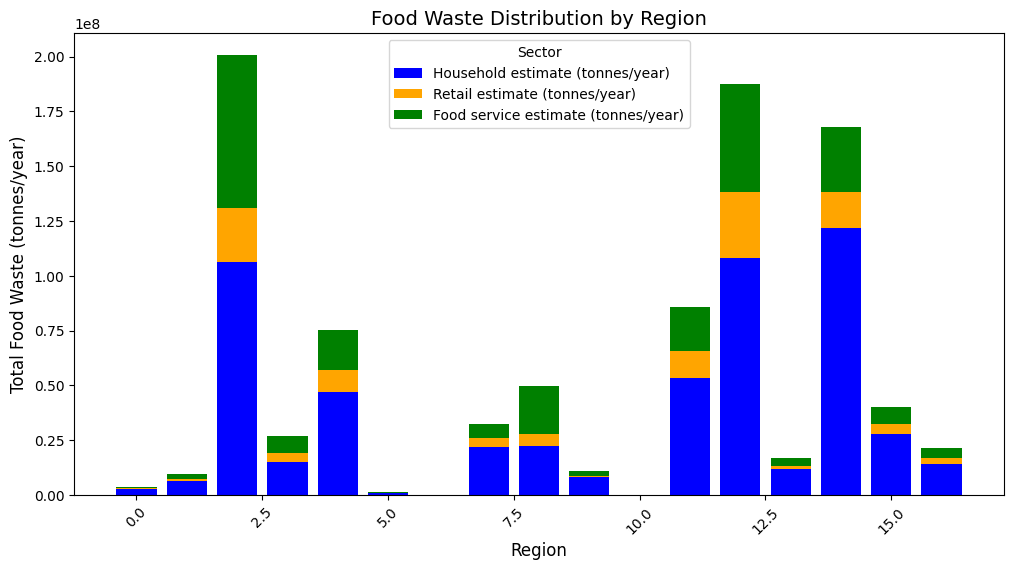

In [29]:
# Group data by region and sum food waste across sectors
region_waste = df.groupby("Region")[["Household estimate (tonnes/year)", 
                                     "Retail estimate (tonnes/year)", 
                                     "Food service estimate (tonnes/year)"]].sum()

# Plot Stacked Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define bottom for stacking
bottom = np.zeros(len(region_waste))

# Colors for different sectors
colors = ["blue", "orange", "green"]
sectors = ["Household estimate (tonnes/year)", "Retail estimate (tonnes/year)", "Food service estimate (tonnes/year)"]

for idx, sector in enumerate(sectors):
    ax.bar(region_waste.index, region_waste[sector], label=sector, bottom=bottom, color=colors[idx])
    bottom += region_waste[sector].values  # Update bottom for stacking

# Labels and Formatting
ax.set_title("Food Waste Distribution by Region", fontsize=14)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Total Food Waste (tonnes/year)", fontsize=12)
ax.legend(title="Sector")
plt.xticks(rotation=45)  # Rotate region labels for readability

# Show plot
plt.show()

C:\Users\harendra\AppData\Local\Temp\ipykernel_32580\2016943403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


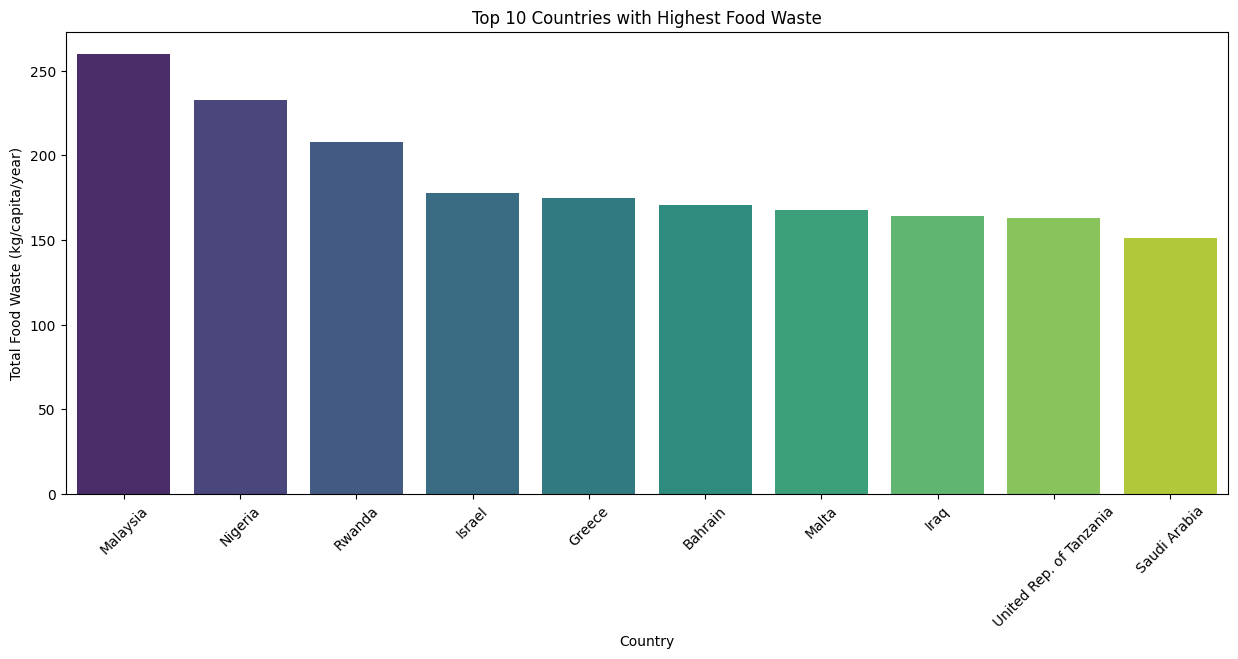

In [8]:
plt.figure(figsize=(15, 6))
top_countries = df.groupby("Country")["combined figures (kg/capita/year)"].sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Food Waste (kg/capita/year)")
plt.title("Top 10 Countries with Highest Food Waste")
plt.show()


C:\Users\harendra\AppData\Local\Temp\ipykernel_32580\2704495432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_waste.index, y=region_waste.values, palette="coolwarm")


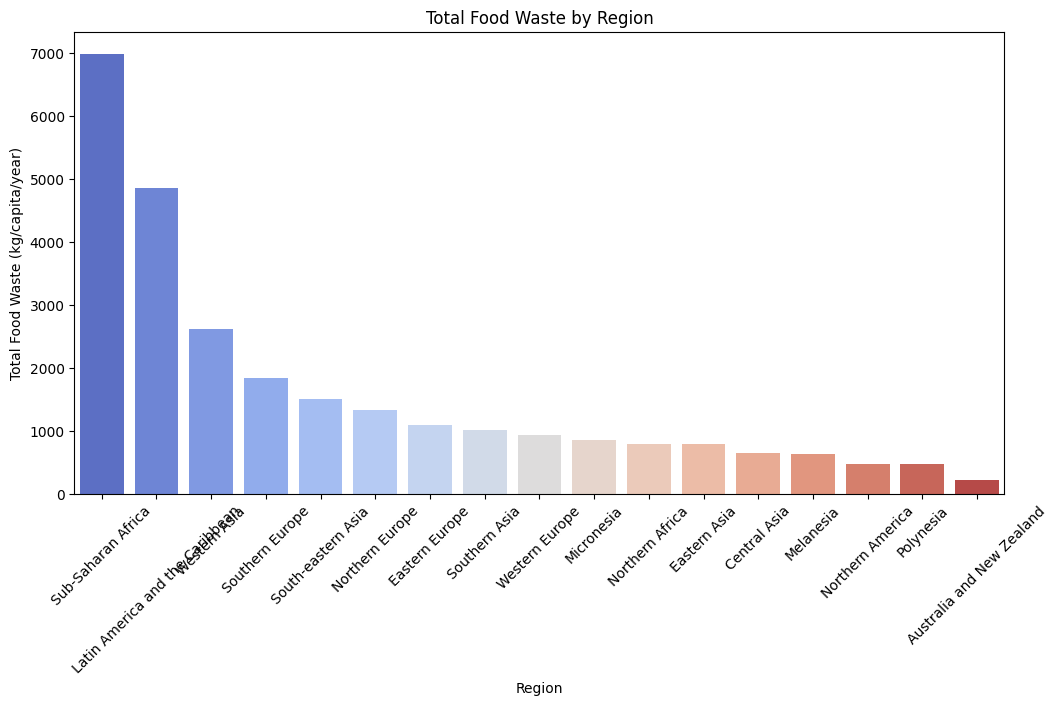

In [9]:
plt.figure(figsize=(12, 6))
region_waste = df.groupby("Region")["combined figures (kg/capita/year)"].sum().sort_values(ascending=False)
sns.barplot(x=region_waste.index, y=region_waste.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Total Food Waste (kg/capita/year)")
plt.title("Total Food Waste by Region")
plt.show()


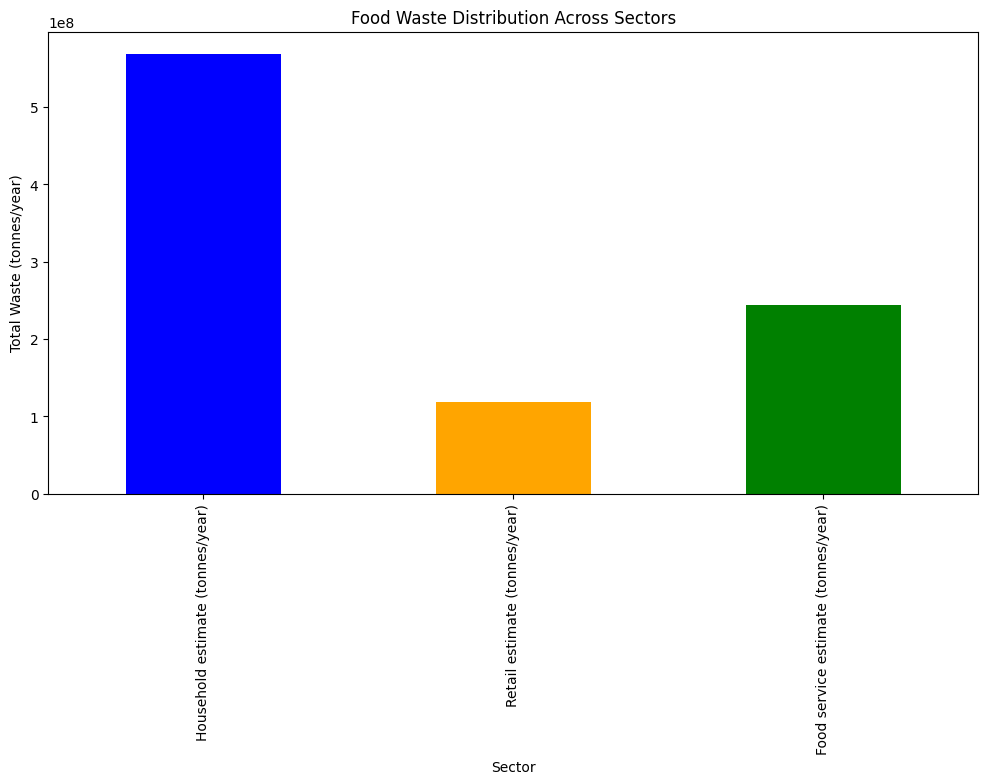

In [10]:
plt.figure(figsize=(12, 6))
sector_waste = df[['Household estimate (tonnes/year)', 'Retail estimate (tonnes/year)', 'Food service estimate (tonnes/year)']].sum()
sector_waste.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel("Sector")
plt.ylabel("Total Waste (tonnes/year)")
plt.title("Food Waste Distribution Across Sectors")
plt.show()


C:\Users\harendra\AppData\Local\Temp\ipykernel_32580\3404976203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Confidence in estimate"], order=df["Confidence in estimate"].value_counts().index, palette="Set2")


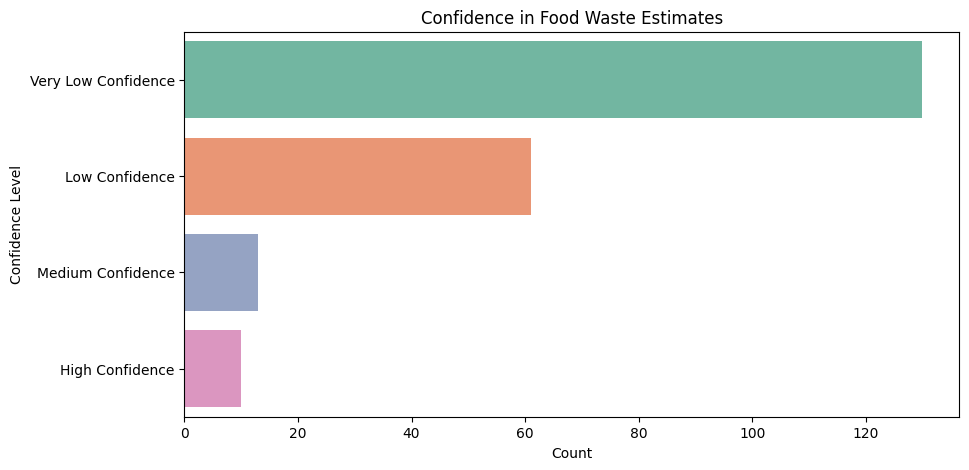

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Confidence in estimate"], order=df["Confidence in estimate"].value_counts().index, palette="Set2")
plt.xlabel("Count")
plt.ylabel("Confidence Level")
plt.title("Confidence in Food Waste Estimates")
plt.show()


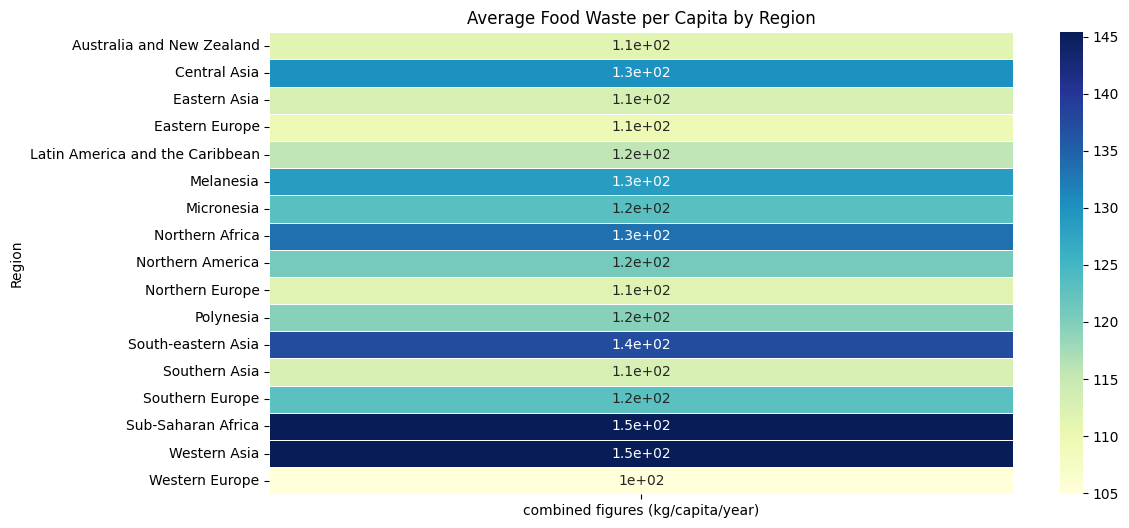

In [12]:
plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(index="Region", values="combined figures (kg/capita/year)", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Food Waste per Capita by Region")
plt.show()


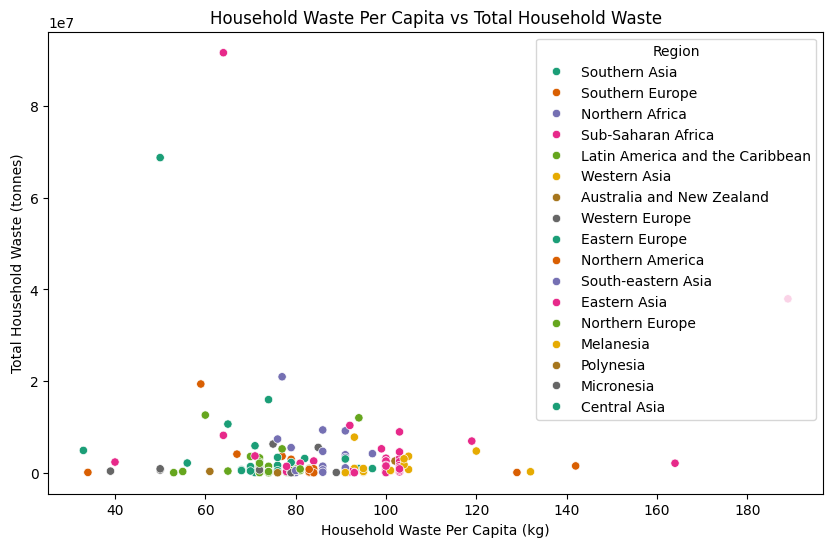

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Household estimate (kg/capita/year)"], y=df["Household estimate (tonnes/year)"], hue=df["Region"], palette="Dark2")
plt.xlabel("Household Waste Per Capita (kg)")
plt.ylabel("Total Household Waste (tonnes)")
plt.title("Household Waste Per Capita vs Total Household Waste")
plt.show()


# Machine Learning:


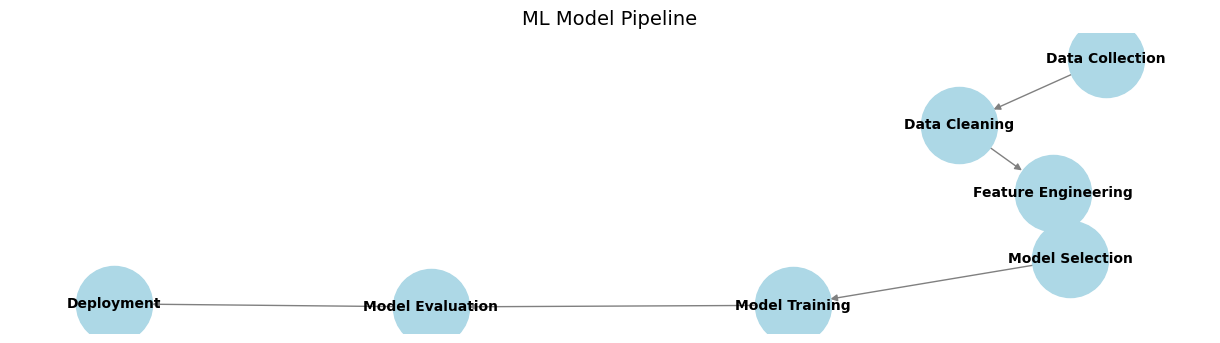

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the pipeline steps
pipeline_steps = [
    ("Data Collection", "Data Cleaning"),
    ("Data Cleaning", "Feature Engineering"),
    ("Feature Engineering", "Model Selection"),
    ("Model Selection", "Model Training"),
    ("Model Training", "Model Evaluation"),
    ("Model Evaluation", "Deployment"),
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(pipeline_steps)

# Draw the graph
plt.figure(figsize=(12, 3))
pos = nx.spring_layout(G)  # Positioning algorithm
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("ML Model Pipeline", fontsize=14)
plt.show()


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting features and target variable
features = ["Household estimate (kg/capita/year)", "Retail estimate (kg/capita/year)", 
            "Food service estimate (kg/capita/year)", "M49 code"]
target = "combined figures (kg/capita/year)"

# Encode categorical values (if needed)
le = LabelEncoder()
df["Region"] = le.fit_transform(df["Region"])  # Encoding Region as numeric

# Splitting dataset into train and test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R-squared Score:", r2_score(y_true, y_pred))

# Evaluate Models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Model: Linear Regression
Mean Absolute Error: 9.914549801303723e-16
Mean Squared Error: 2.348237113216035e-29
Root Mean Squared Error (RMSE): 4.845861237402527e-15
R-squared Score: 1.0

Model: Random Forest
Mean Absolute Error: 3.534651162790698
Mean Squared Error: 58.322081395348825
Root Mean Squared Error (RMSE): 7.636889510484542
R-squared Score: 0.8656387557096117


C:\Users\harendra\AppData\Local\Temp\ipykernel_32580\816874419.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


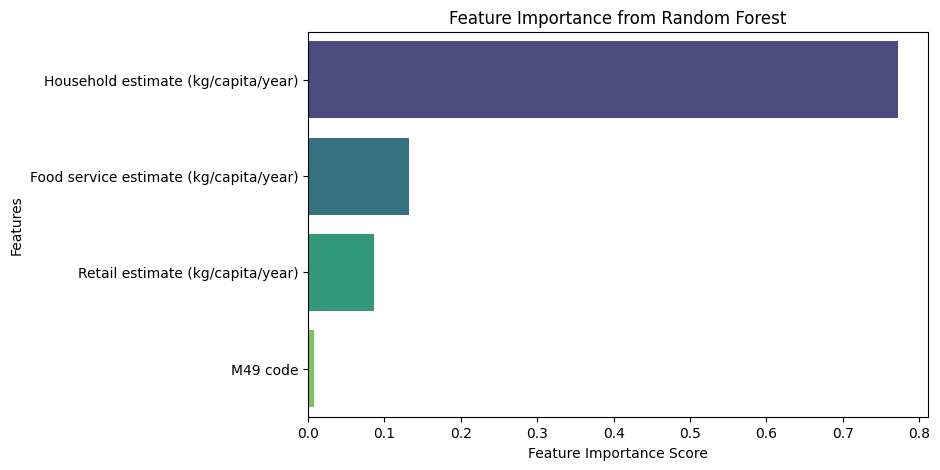

In [62]:
# Extract feature importance
feature_importance = rf.feature_importances_
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

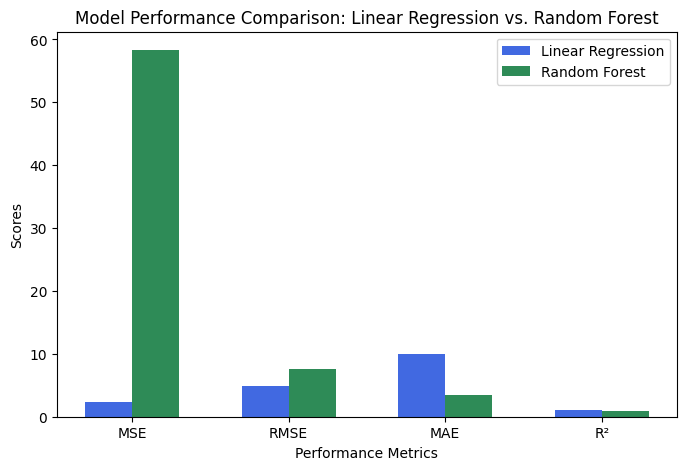

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the performance metrics for Linear Regression and Random Forest
metrics = ["MSE","RMSE", "MAE","R²"]
linear_regression = [2.348,4.846, 9.914, 1.0]  # Example values
random_forest = [58.32,7.63, 3.534, 0.865]      # Example values

# Set position for bars
x = np.arange(len(metrics))

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.3

ax.bar(x - bar_width/2, linear_regression, width=bar_width, label="Linear Regression", color="royalblue")
ax.bar(x + bar_width/2, random_forest, width=bar_width, label="Random Forest", color="seagreen")

# Labels and title
ax.set_xlabel("Performance Metrics")
ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison: Linear Regression vs. Random Forest")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the chart
plt.show()


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate Best Model
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Model: Tuned Random Forest
Mean Absolute Error: 3.698255813953488
Mean Squared Error: 65.47551305464803
Root Mean Squared Error (RMSE): 8.091694078167317
R-squared Score: 0.8491588229689679


In [18]:
print((y_test,y_pred_best_rf))

(9      133
197    113
66     115
191    147
117    115
111    111
15     113
86     124
75     128
144    118
182    145
170    132
141    118
73     145
178     84
167    151
190    130
18      97
45     116
184    116
98      88
209    116
211    148
195    137
148    116
104    135
30     147
25     104
175     61
16     112
55     144
138    147
158     75
93     124
69     135
203    163
171    147
152    123
97     116
84     116
101    141
200    120
60     124
Name: combined figures (kg/capita/year), dtype: int64, array([162.1       , 113.        , 115.13882353, 147.        ,
       115.11333333, 110.45966667, 113.        , 124.185     ,
       126.98      , 115.98      , 144.        , 132.94      ,
       117.94815686, 144.        ,  98.66      , 161.82      ,
       129.82      ,  95.2       , 115.96      , 116.48      ,
        97.16      , 116.46      , 148.08      , 137.18      ,
       115.98      , 135.04      , 147.        , 107.2       ,
        88.64      , 111.86   

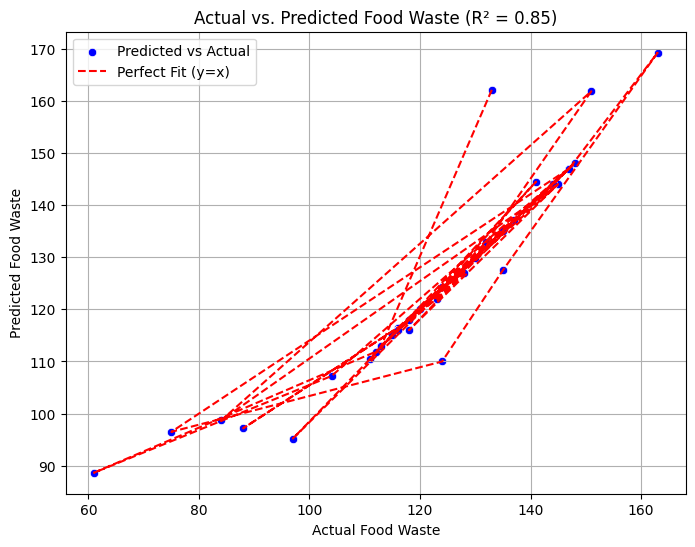

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate R² score
r2 = r2_score(y_test,y_pred_best_rf)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, color='blue', label="Predicted vs Actual")
plt.plot(y_test,y_pred_best_rf, color='red', linestyle="--", label="Perfect Fit (y=x)")

# Labels and title
plt.xlabel("Actual Food Waste")
plt.ylabel("Predicted Food Waste")
plt.title(f"Actual vs. Predicted Food Waste (R² = {r2:.2f})")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [19]:
import pickle

# Save the best model
with open("food_waste_model.pkl", "wb") as model_file:
    pickle.dump(best_rf, model_file)


In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

app = Flask(__name__)

# Load trained model
with open("food_waste_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = np.array([data['household'], data['retail'], data['food_service'], data['m49_code']]).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({"predicted_food_waste": prediction})

if __name__ == '__main__':
    app.run(debug=True)


In [38]:
# python app.py
import streamlit as st
import pickle
import numpy as np

# Load trained model
with open("food_waste_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

st.title("Food Waste Prediction App")
st.write("Predict food waste levels based on various factors.")

# User Inputs
household = st.number_input("Household Waste (kg/capita/year)", min_value=0)
retail = st.number_input("Retail Waste (kg/capita/year)", min_value=0)
food_service = st.number_input("Food Service Waste (kg/capita/year)", min_value=0)
m49_code = st.number_input("M49 Code", min_value=0)

if st.button("Predict"):
    features = np.array([[household, retail, food_service, m49_code]])
    prediction = model.predict(features)[0]
    st.write(f"Predicted Food Waste: {prediction:.2f} kg/capita/year")


2025-03-27 13:01:19.131 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:01:19.623 
  command:

    streamlit run C:\Users\harendra\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-27 13:01:19.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:01:19.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:01:19.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:01:19.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:01:19.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:01:19.630 T